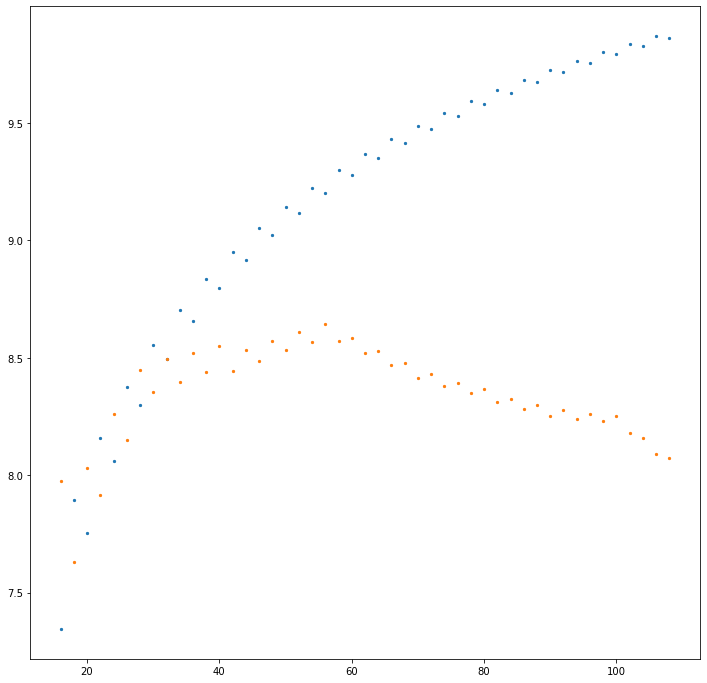

[12.5, -12.5, 0.0, -50.0, -12.5, 12.841]
Done
Time taken:  3.20879954099928


In [3]:
#5D Chi-Squared Surface Thing

import numpy as np
import matplotlib.pyplot as plt
import time
import math

start = time.perf_counter()

measuredNuclearData = np.loadtxt("ZNBE.dat")

for i in measuredNuclearData:
    
    i[2] = i[2] * (i[0] + i[1]) 
    
#This makes measuredNuclearData elements be: [Z, N, BE] instead of BE/A

samples = 5

chiSqSurfaceData = [0, 0, 0, 0, 0, float('inf'), []]

AvField = np.linspace(0, 50, samples)
AsField = np.linspace(-50, 0, samples)
AcField = np.linspace(-50, 0, samples)
AaField = np.linspace(-50, 0, samples)
ApField = np.linspace(-50, 0, samples)

for Av in AvField:
    Av = round(Av, 1)
    for As in AsField:
        As = round(As, 1)
        for Ac in AcField:
            Ac = round(Ac, 1)
            for Aa in AaField:
                Aa = round(Aa, 1)
                for Ap in ApField:
                    Ap = round(Ap, 1)
                        
                    chiSq = 0
                    SEMFData = []
                    realData = []

                    for i in measuredNuclearData:

                        if i[0]!=i[1] or i[0] < 8:
                            continue
    
                            
                        Z = i[0]
                        N = i[1]
                        A = N + Z

                        vol = Av * A
                        sur = As * A**(2/3)
                        cou = Ac * (Z * (Z - 1)) * A**(-1/3)
                        asy = Aa * (N - Z)**2 * A**(-1)

                        if Z%2==0 and N%2==0:
                            pai = Ap * A**-0.5
                        elif Z%2!=0 and N%2!=0:
                            pai = -Ap * A**-0.5
                        else:
                            pai = 0

                        BE = vol + sur + cou + asy + pai

                        SEMFData.append([A, BE])
                        chiSq += (BE - i[2])**2
                        
                    chiSq = round(math.log(chiSq), 3)
                    
                    if chiSq < chiSqSurfaceData[5]:
                        chiSqSurfaceData = [Av, As, Ac, Aa, Ap, chiSq, SEMFData]

SEMFData = chiSqSurfaceData[6]

plt.figure(figsize=(12,12))

A = [i[0] for i in SEMFData]
BE = [i[1]/i[0] for i in SEMFData]

plt.scatter(A, BE, s=5)
realData = [[i[0]+i[1],i[2]] for i in measuredNuclearData if (i[0] == i[1] and i[0] >= 8)]

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(chiSqSurfaceData[0:6])

print("Done")
stop = time.perf_counter()
print("Time taken: ", stop - start)

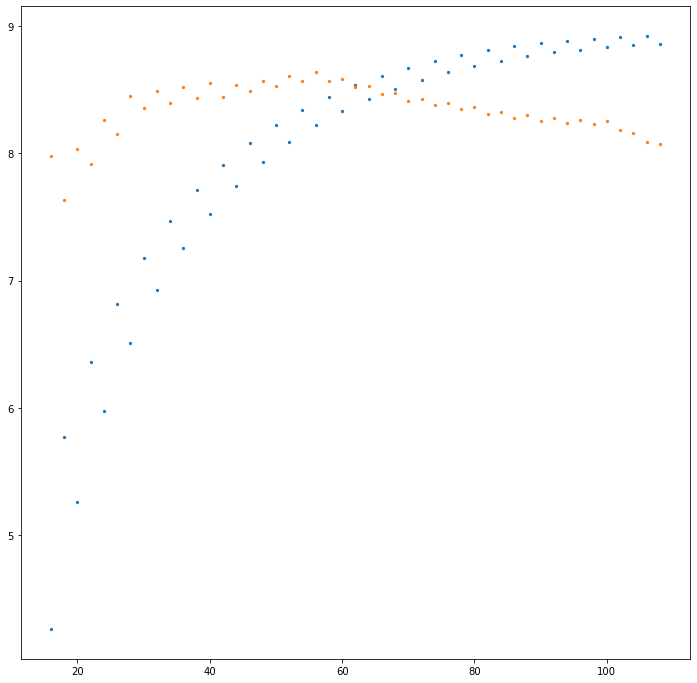

[19.6, -35.1, -0.6, -47.3, -36.9, 11.358]
Done
Time taken:  1.0745192080003108


In [4]:
start = time.perf_counter()

AvField = np.linspace(0, 50, 501)
AsField = np.linspace(-50, 0, 501)
AcField = np.linspace(-50, 0, 501)
AaField = np.linspace(-50, 0, 501)
ApField = np.linspace(-50, 0, 501)

number_of_points = 1000

SEMFData = []
chiSqSurfaceData = [0, 0, 0, 0, 0, float('inf'), []]

for i in range(number_of_points):
    
    chiSq = 0
    SEMFData = []
    
    Av = round(AvField[np.random.randint(0, 501)], 1)
    As = round(AsField[np.random.randint(0, 501)], 1)
    Ac = round(AcField[np.random.randint(0, 501)], 1)
    Aa = round(AaField[np.random.randint(0, 501)], 1)
    Ap = round(ApField[np.random.randint(0, 501)], 1)
    
    for i in measuredNuclearData:
        
        if i[0]!=i[1] or i[0] < 8:
            continue
    
        Z = i[0]
        N = i[1]
        A = N + Z

        vol = Av * A
        sur = As * A**(2/3)
        cou = Ac * (Z * (Z - 1)) * A**(-1/3)
        asy = Aa * (N - Z)**2 * A**(-1)

        if Z%2==0 and N%2==0:
            pai = Ap * A**-0.5
        elif Z%2!=0 and N%2!=0:
            pai = -Ap * A**-0.5
        else:
            pai = 0

        BE = vol + sur + cou + asy + pai

        SEMFData.append([A, BE])
        chiSq += (BE - i[2])**2
        
    chiSq = round(math.log(chiSq), 3)
    
    if chiSq < chiSqSurfaceData[5]:
        chiSqSurfaceData = [Av, As, Ac, Aa, Ap, chiSq, SEMFData]

SEMFData = chiSqSurfaceData[6]
realData = [[i[0]+i[1],i[2]] for i in measuredNuclearData if (i[0] == i[1] and i[0] >= 8)]

plt.figure(figsize=(12,12))

A = [i[0] for i in SEMFData]
BE = [i[1]/i[0] for i in SEMFData]

plt.scatter(A, BE, s=5)

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(chiSqSurfaceData[0:6])

print("Done")
stop = time.perf_counter()
print("Time taken: ", stop - start)